<div style=" background-color: RGB(0,200,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 5 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Optimisez la gestion des données d'une boutique avec R ou Python
</h2>
</div>

# <span style="color:red"> Version antérieure à la mise à jour du 10 Mai 2023 </span>

<div style=" background-color: RGB(0,200,200);" >
   
## Contexte: 
Faciliter la gestion des stocks et améliorer sa visibilité en terme d’analyse des ventes sur le net

## Plan d'étude: Cette première mission se déroule en 3 axes:    
+ 1er axe: Fusionner l’export ERP (références produit, prix de vente, état de stocks) et l’export de table CMS (noms, descriptions, nombre de ventes des produits commercialisés en ligne) à l’aide d’une table de liaison (référence  produits product_id pour l’ERP et sku avec la table CMS .
+ 2ème axe: Déterminer le chiffre d’affaire par produit et le chiffre d’affaire total.
+ 3ème axe: Détecter les valeurs aberrantes, les lister et en faire une représentation graphique

## Analyses complémentaires:
+ Les bouteilles invendues
+ Analyses sur l'évolution du chiffre d'affaire en fonction du temps
</div>

<div style="background-color: RGB(0,200,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des librairies Pandas, Matplotlib et Numpy
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import numpy as np
import seaborn as sns

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importation du fichier web.xlsx
web = pd.read_excel('web.xlsx')
web.head(5)

C:\Users\bello\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [3]:
# Importation du fichier liaison.xlsx
liaison = pd.read_excel('liaison.xlsx')
liaison.head(5)

C:\Users\bello\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [4]:
# Importation du fichier erp.xlsx
erp = pd.read_excel('erp.xlsx')
erp.head(5)

C:\Users\bello\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


<div style="background-color: RGB(0,200,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">2.1 - Analyse exploratoire du fichier "web"</h3>
</div>

In [5]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(web.shape[0]))
print("Le tableau comporte {} colonne(s)".format(web.shape[1]))

Le tableau comporte 1513 observation(s) ou article(s)
Le tableau comporte 28 colonne(s)


In [6]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [7]:
#Remplacer les NaN par 0
web[['tax_class', 'post_content_filtered','post_mime_type']]=web[['tax_class', 'post_content_filtered','post_mime_type']] .fillna(0)
web.head(5)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0,0,0,0.0,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [8]:
#Suppression de colonnes de 'virtual' à 'average_rating' qui n'ont aucune valeurs
web = web.drop(columns=['virtual','downloadable','rating_count','average_rating'])
web.head()

,sku,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


**<span style="color:blue">Le dataframe "web" contient 1513 lignes, tandis que les deux autres dataframes, "liaison" et "erp", ont un nombre maximum de lignes compris entre 715 et 825.
Les codes sku sont en doubles, et les deuxièmes lignes à la colonne "post_mime_type" servent à afficher la photo de la bouteille de vin. C'est que l'on observe pour le code sku 15298:</span>**

In [9]:
web.loc[web['sku']==15298]

,sku,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1,15298,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
799,15298,6.0,NaN,0.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,NaN,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [10]:
#Supprimer les doublons à partir de la colonne "sku" en ne laissant que la première combinaison de valeurs observées.
web=web.drop_duplicates(['sku'], keep='first')
web.head(5)

,sku,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,10.0,taxable,0.0,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,15298,6.0,taxable,0.0,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,15296,0.0,taxable,0.0,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,15300,0.0,taxable,0.0,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,NaN,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,19814,3.0,taxable,0.0,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,NaN,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [11]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 798
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   total_sales            714 non-null    float64       
 2   tax_status             714 non-null    object        
 3   tax_class              715 non-null    float64       
 4   post_author            714 non-null    float64       
 5   post_date              714 non-null    datetime64[ns]
 6   post_date_gmt          714 non-null    datetime64[ns]
 7   post_content           0 non-null      float64       
 8   post_title             714 non-null    object        
 9   post_excerpt           714 non-null    object        
 10  post_status            714 non-null    object        
 11  comment_status         714 non-null    object        
 12  ping_status            714 non-null    object        
 13  post_

**<span style="color:blue">Suite à cette modification, le nombre de ligne maximale est de 715, il y a donc moins d'incohérence</span>**

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">2.1 - Analyse exploratoire du fichier "liaison"</h3>
</div>

In [12]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [13]:
#Renommer la colonne "id_web" en "sku"
liaison=liaison.rename(columns={'id_web':'sku'})

In [14]:
# Changer le type de "product_id" pour le mettre sous forme objet
liaison["product_id"]=liaison["product_id"].astype(object)

In [15]:
#Vérifier que la modification a bien eu lieu aux colonnes "product_id" et "sku"
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    object
 1   sku         734 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">2.2 - Analyse exploratoire du fichier "erp"</h3>
</div>

In [16]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs non-nulles présentes dans chacune des colonnes
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [17]:
# Faire la même modification que le df "liaison": Changer le type de "product_id" pour le mettre sous forme objet
erp["product_id"]=erp["product_id"].astype(object)

In [18]:
#Vérifier que la modification a bien eu lieu à la colonne "product_id" 
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    object 
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 32.4+ KB


<div style="background-color: RGB(0,200,200);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Etude des données </h2>
</div>

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.1 - Rapprocher les deux exports "web" et "erp"</h3>
</div>

In [19]:
# 1ère étape : les dataframes "erp" et "liaison" ont le même nombre de lignes, la Fusion commence alors entre ces deux dataframes 
erpLiaison=erp.merge(liaison, on='product_id')
erpLiaison.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [20]:
erpLiaison.shape

(825, 6)

In [21]:
# 2ème étape: Fusion à droite entre les dataframes "liaison" et "erpLiaison" pour se concentrer sur l'identifiant "sku" de la table située à droite.
#la jointure à droite conservera toute les correspondances de la table "erpLiaison" et elle complètera si possible avec les informations de la table "web"
A = erpLiaison.merge(web, on='sku', how='right')
A.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4954,1,25.0,0,instock,bon-cadeau-25-euros,10.0,taxable,0.0,1.0,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1,3847,1,24.2,0,outofstock,15298,6.0,taxable,0.0,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
2,3849,1,34.3,0,outofstock,15296,0.0,taxable,0.0,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,3850,1,20.8,0,outofstock,15300,0.0,taxable,0.0,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,4032,1,14.1,0,outofstock,19814,3.0,taxable,0.0,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0


In [22]:
A.shape

(805, 29)

In [23]:
#Nouveau Dataframe "A" ne sélectionnant que les colonnes "price", "stock_sales", "total_sales", "post_title" et "post_modified"
A=A[['price','stock_quantity','onsale_web' ,'total_sales','post_title','post_modified']]
A.head(5)

,price,stock_quantity,onsale_web,total_sales,post_title,post_modified
0,25.0,0,1,10.0,Bon cadeau de 25€,2018-06-01 14:13:57
1,24.2,0,1,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,2019-12-30 09:30:29
2,34.3,0,1,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,2019-12-21 09:00:17
3,20.8,0,1,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,2020-06-26 18:15:03
4,14.1,0,1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,2020-01-04 16:36:01


<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.1 - Calcul du chiffre d'affaire </h3>
</div>

### Calcul du chiffre d'affaire par produits

In [24]:
# Création de la colonne "Chiffre d'affaire" permettant de calculer le chiffre d'affaire par produits
A["Chiffre d'affaire"]=A['price']*A['total_sales']
A.head(5)

,price,stock_quantity,onsale_web,total_sales,post_title,post_modified,Chiffre d'affaire
0,25.0,0,1,10.0,Bon cadeau de 25€,2018-06-01 14:13:57,250.0
1,24.2,0,1,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,2019-12-30 09:30:29,145.2
2,34.3,0,1,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,2019-12-21 09:00:17,0.0
3,20.8,0,1,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,2020-06-26 18:15:03,0.0
4,14.1,0,1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,2020-01-04 16:36:01,42.3


In [25]:
# Remplacer les valeurs NaN par du vide ''
A['post_title'] = A['post_title'].fillna('')

In [26]:
# Aggrégation par nom de vins et calcul du chiffre d'affaire par produits 
CA=A.groupby(['post_title','price','post_modified'])[['stock_quantity','total_sales',"Chiffre d'affaire"]] .sum()
CA.head(5)

,,,stock_quantity,total_sales,Chiffre d'affaire
post_title,price,post_modified,,,
Agnès Levet Côte Rôtie Améthyste 2017,41.2,2020-05-21 14:00:02,0,4.0,164.8
Agnès Levet Côte Rôtie Maestria 2017,55.0,2020-07-25 15:45:02,11,3.0,165.0
Agnès Levet Côte Rôtie Péroline 2017,57.0,2020-07-28 09:45:02,26,3.0,171.0
Alain Graillot Crozes-Hermitage Blanc 2018,24.4,2020-07-28 09:45:02,1,10.0,244.0
Alain Graillot Crozes-Hermitage Rouge 2017,24.4,2020-07-18 10:55:03,0,6.0,146.4


In [27]:
# Réinitialisation de l'index pour restaurer les colonnes "post_title", "price" et "post_modified" 
CA = CA.reset_index()
CA.head(5)

,post_title,price,post_modified,stock_quantity,total_sales,Chiffre d'affaire
0,Agnès Levet Côte Rôtie Améthyste 2017,41.2,2020-05-21 14:00:02,0,4.0,164.8
1,Agnès Levet Côte Rôtie Maestria 2017,55.0,2020-07-25 15:45:02,11,3.0,165.0
2,Agnès Levet Côte Rôtie Péroline 2017,57.0,2020-07-28 09:45:02,26,3.0,171.0
3,Alain Graillot Crozes-Hermitage Blanc 2018,24.4,2020-07-28 09:45:02,1,10.0,244.0
4,Alain Graillot Crozes-Hermitage Rouge 2017,24.4,2020-07-18 10:55:03,0,6.0,146.4


In [28]:
# Affichage des 10 chiffre d'affaire les plus élevés
CA.sort_values("Chiffre d'affaire", ascending=False).head(10)

,post_title,price,post_modified,stock_quantity,total_sales,Chiffre d'affaire
94,Champagne Gosset Grand Blanc de Blancs,49.0,2020-08-12 14:00:03,0,96.0,4704.0
96,Champagne Gosset Grand Rosé,49.0,2020-08-14 16:45:03,11,87.0,4263.0
201,Cognac Frapin VIP XO,176.0,2020-08-22 11:35:03,8,13.0,2288.0
95,Champagne Gosset Grand Millésime 2006,53.0,2020-08-20 09:30:03,8,30.0,1590.0
97,Champagne Gosset Grande Réserve,39.0,2020-08-27 11:25:02,1,40.0,1560.0
87,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,2020-08-13 10:15:02,2,11.0,1391.5
91,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,2020-03-07 11:18:45,0,5.0,1125.0
395,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,2020-07-28 15:25:03,0,36.0,1044.0
254,Domaine Giudicelli Patrimonio Blanc 2019,25.2,2020-08-27 10:12:58,120,41.0,1033.2
427,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,2020-08-27 16:05:04,157,62.0,1029.2


In [29]:
CA.shape

(714, 6)

(0.0, 5000.0)

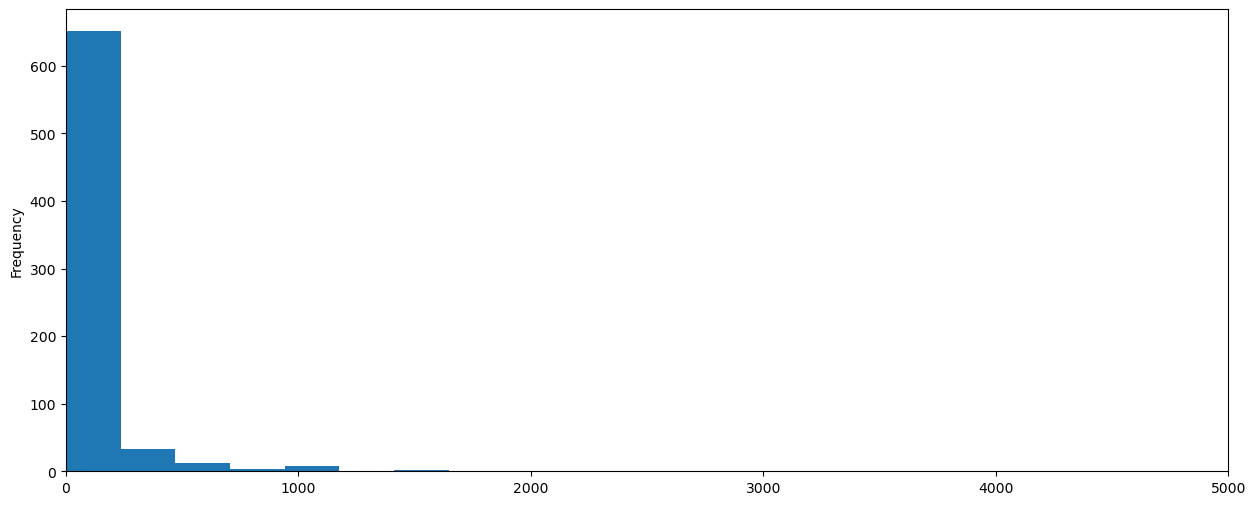

In [30]:
# Fréquence où la boutique en ligne réalise des ventes 
plt.figure(figsize=(15,6))
CA["Chiffre d'affaire"].plot.hist(bins=20)
plt.xlim(0,5000)

### Calcul du chiffre d'affaire total

In [31]:
#Calcul du chiffre d'affaire total 
Total_CA=CA["Chiffre d'affaire"].sum()
print("Le chiffre d'affaire est de:", round(Total_CA,3), "€")

Le chiffre d'affaire est de: 70568.6 €


**<span style="color:blue"> Si l'on exclue les bouteilles invendues (totales_sales=0) alors le nombre de fois où l'entreprise fait un chiffre d'affaire passe de 715 à 385. </span>**

In [32]:
#Statistiques du chiffre d'affaire
CA_Stat=CA["Chiffre d'affaire"] .describe()
CA_Stat

count     714.000000
mean       98.835574
std       307.685071
min         0.000000
25%         0.000000
50%        15.250000
75%        91.150000
max      4704.000000
Name: Chiffre d'affaire, dtype: float64

In [33]:
CA=CA.loc[CA["total_sales"]>0]


In [34]:
#Statistiques du chiffre d'affaire
CA_Stat=CA["Chiffre d'affaire"] .describe()
round(CA_Stat,2)

count     385.00
mean      183.30
std       400.32
min         6.50
25%        38.60
50%        81.60
75%       164.40
max      4704.00
Name: Chiffre d'affaire, dtype: float64

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.2- Vérifier les erreurs de saisies dans certains prix des produits </h3>
</div>

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.2.1- Représentation graphique des "erreurs" </h3>
</div>

### 1.Visualisation des outliers grâce à un boxplot

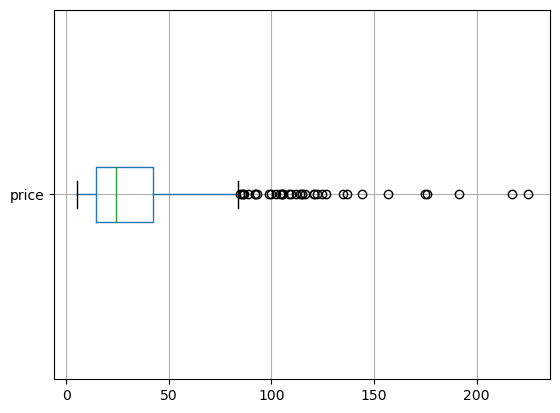

In [35]:
# Visualisation des outliers grâce à un bloxplot
A.boxplot(column="price", vert=False)
plt.show()

### d. Détection des outliers par calcul (méthode des interquartiles)

In [36]:
# Calculer les quartiles
Q1 = A['price'].quantile(0.25)
Q2 = A['price'].quantile(0.5)
Q3 = A['price'].quantile(0.75)

# Calculer l'interquartile
IQR = Q3 - Q1

print("Premier quartile : ", Q1)
print("Deuxième quartile (médiane) : ", Q2)
print("Troisième quartile : ", Q3)
print("Interquartile : ", IQR)

Premier quartile :  14.6
Deuxième quartile (médiane) :  24.4
Troisième quartile :  42.5
Interquartile :  27.9


In [37]:
# Calcul des valeurs limites
Xmin=Q1-(1.5*IQR)
Xmax=Q3+(1.5*IQR)

print("Le prix minimal est de :",round(Xmin,2))
print("Le prix maximal est de :",Xmax)

Le prix minimal est de : -27.25
Le prix maximal est de : 84.35


In [38]:
# Recherche des outliers en cherchant qui sont au-dessus de la limite supérieure et en-dessous de la limite inférieure
ValeursExtremes=A.dropna()
ValeursExtremes=A[(A['price']>Xmax)|(A['price']<Xmin)]


# Affichage du nombre d'outliers
print("Nombres d'outliers détectés: "+ str(len(ValeursExtremes)))
print(list(ValeursExtremes['price']))

Nombres d'outliers détectés: 36
[100.0, 88.4, 86.1, 144.0, 84.7, 92.0, 225.0, 126.5, 85.6, 176.0, 108.5, 157.0, 104.0, 109.6, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0]


### 2.Visualisation des outliers grâce à un histogramme 

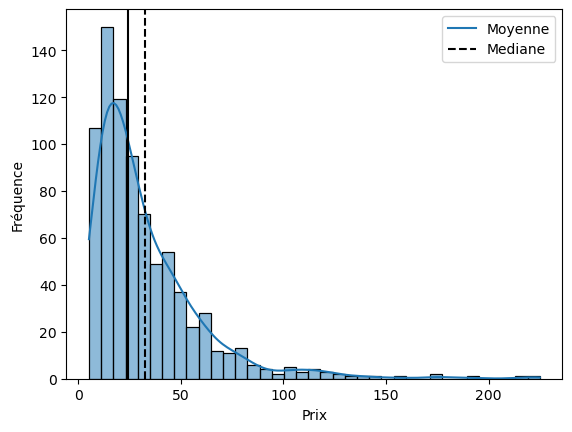

In [39]:
#Calcul de la moyenne des prix 
MoyPrix=A['price'].mean()
# Calcul du Prix médian
PrixMedian=A['price'].median()

# Création de l'histogramme
sns.histplot(A['price'] , kde=True)

# Ajout des labels des axes
plt.xlabel('Prix')
plt.ylabel('Fréquence')
#Ajout des légendes
plt.axvline(MoyPrix, color="black", linestyle="--")
plt.axvline(PrixMedian, color="black", linestyle="-")
plt.legend({"Moyenne":MoyPrix,"Mediane":PrixMedian})
# Affichage du graphique
plt.show()

### a. Déterminer les tendances centrales de l'ensemble des prix

In [40]:
# Calcul du mode
Mode=A['price'].mode()
#Calcul de la moyenne des prix 
MoyPrix=A['price'].mean()
# Prix médian
PrixMedian=A['price'].median()
print("Les prix les plus fréquents sont de :", Mode)
print("La moyenne des prix: ", round(MoyPrix,2))
print("Le prix médian : ", PrixMedian)

Les prix les plus fréquents sont de : 0    45.0
Name: price, dtype: float64
La moyenne des prix:  32.67
Le prix médian :  24.4


###  b. Déterminer les dispersions

In [41]:
#Calcul de variance
Variance=A['price'].var()
# Calcul de l'écart-type
EcartType=A['price'].std()
round(EcartType,2)
#Calcul du Coefficient de variation
CV=(A['price'].std()/A['price'].mean())*100

print("Résultat pour la variance: ", round(Variance,2))
print("Résultat pour l'écart-type: ", round(EcartType,2))
print("Résultat pour le coefficient de variance : ", round(CV,2))

Résultat pour la variance:  730.93
Résultat pour l'écart-type:  27.04
Résultat pour le coefficient de variance :  82.77


**<span style="color:blue">Si le prix médian des bouteilles de vin est de 24.4 et que l'écart-type est de 27.04, il y a donc une certaine dispersion des prix autour de la médiane. Comparé à la moyenne, qui était de 32.42, le prix médian de 24.4 suggère que les prix sont asymétriquement distribués.</span>**

**<span style="color:blue">L'écart-type de 27.04 est relativement élevé par rapport à la médiane de 24.4, les prix individuels des bouteilles de vin peuvent varier considérablement par rapport à la médiane. Certains prix sont beaucoup plus élevés que la médiane, ce qui contribue à l'écart-type élevé. </span>**

### c. Déterminer les mesures de forme

In [42]:
# Calcul des mesures de forme
skewness=A['price'].skew()
print("Le skewness est de:", round(skewness,2) )

Le skewness est de: 2.59


**<span style="color:blue">C'est une asymétrie positive, La distribution des prix est étalée vers la gauche et la queue de la distribution est étendue vers la la droite.Il y a une plus grande concentration de prix en-dessous de la moyenne avec une dispersion de quelques valeurs très élevées . </span>**

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.2.2- Liste de valeurs aberrantes </h3>
</div>

### a. Création d'un sous-dataset "PrixEleve" qui va répertorié les "prix aberrants

In [43]:
# Création d'une colonne prix aberrants (outliers) permettant de calculer les outliers par la méthode IQR (interquartile)
A['prix aberrants']=A['price'][A['price']>Xmax]


In [44]:
# Création d'un dataframe PrixEleve "A" ne filtrant que les "prix aberrants" qui sont au-dessus de la limite supérieure Xmax.
PrixEleve=A.loc[A['prix aberrants']>=(A['price']>Xmax)]
PrixEleve.head(10)

,price,stock_quantity,onsale_web,total_sales,post_title,post_modified,Chiffre d'affaire,prix aberrants
64,100.0,11,1,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2020-02-08 11:45:02,0.0,100.0
66,88.4,5,1,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2020-02-20 09:55:02,0.0,88.4
178,86.1,0,0,NaN,,NaT,NaN,86.1
189,144.0,0,1,NaN,,NaT,NaN,144.0
206,84.7,0,1,NaN,,NaT,NaN,84.7
214,92.0,18,0,NaN,,NaT,NaN,92.0
291,225.0,0,1,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2020-03-07 11:18:45,1125.0,225.0
293,126.5,2,1,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2020-08-13 10:15:02,1391.5,126.5
297,85.6,0,1,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,2019-12-23 09:30:11,85.6,85.6
310,176.0,8,1,13.0,Cognac Frapin VIP XO,2020-08-22 11:35:03,2288.0,176.0


In [45]:
# Suppression des lignes où il y a beaucoup de colonnes contenant des données Nan
PrixEleve=A.dropna()
PrixEleve.head(10)

,price,stock_quantity,onsale_web,total_sales,post_title,post_modified,Chiffre d'affaire,prix aberrants
64,100.0,11,1,0.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2020-02-08 11:45:02,0.0,100.0
66,88.4,5,1,0.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2020-02-20 09:55:02,0.0,88.4
291,225.0,0,1,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2020-03-07 11:18:45,1125.0,225.0
293,126.5,2,1,11.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2020-08-13 10:15:02,1391.5,126.5
297,85.6,0,1,1.0,Champagne Larmandier-Bernier Grand Cru Les Che...,2019-12-23 09:30:11,85.6,85.6
310,176.0,8,1,13.0,Cognac Frapin VIP XO,2020-08-22 11:35:03,2288.0,176.0
311,108.5,2,1,2.0,Cognac Frapin Château de Fontpinot XO,2020-08-12 09:30:16,217.0,108.5
313,157.0,3,1,0.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,2020-03-14 16:05:04,0.0,157.0
314,104.0,6,1,1.0,Cognac Frapin Cigar Blend,2020-07-04 09:45:03,104.0,104.0
319,109.6,7,1,0.0,Château de Meursault Puligny-Montrachet 1er Cr...,2020-02-06 16:35:02,0.0,109.6


In [46]:
print("Nombres d'outliers détectés: "+ str(len(PrixEleve)))

Nombres d'outliers détectés: 32


**<span style="color:blue">Le prix de certaines bouteilles est affiché, mais pas leur nom, après leurs suppression du dataframe "PrixEleve" le nombre d'outliers est passé de 36 à 32. </span>**

### b. Liste des "prix aberrants

In [47]:
ListeOutliers=PrixEleve[['post_title','prix aberrants']].sort_values('prix aberrants', ascending=False)
ListeOutliers

,post_title,prix aberrants
291,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0
517,David Duband Charmes-Chambertin Grand Cru 2014,217.5
678,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3
310,Cognac Frapin VIP XO,176.0
644,Camille Giroud Clos de Vougeot 2016,175.0
313,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0
473,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0
733,Champagne Gosset Célébris Vintage 2007,135.0
293,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5
602,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8


### Comment gérer les bouteilles les plus chères? Pourquoi doivent-elles être gérées?

**<span style="color:blue">Ces outliers nécessitent une gestion particulière car ils peuvent fausser les analyses statistiques telles que la moyenne, la médiane et l'écart type. Ils peuvent également fausser les prévisions de ventes, car ces bouteilles peuvent avoir une demande très faible et une offre très limitée.</span>**

**<span style="color:blue">Une approche mathématique pour gérer ces outliers serait d'utiliser des méthodes statistiques telles que la régression quantile, qui permet de modéliser les quantiles de la distribution des prix des bouteilles, y compris les outliers.
</span>**

**<span style="color:red"> Remarques: L'idéal pour gérer les bouteilles les plus chères serait de les traiter comme des produits haut de gamme ou de prestige et de les vendre dans des canaux de distribution différents, tels que des enchères spécialisées, des boutiques de luxe ou des restaurants gastronomiques haut de gamme. 
    En vendant ces bouteilles dans des canaux de distribution séparés, les vendeurs peuvent éviter de diluer la valeur de ces bouteilles en les associant à des produits de qualité inférieure.</span>**
    
**<span style="color:red"> En vendant ces bouteilles dans des canaux de distribution séparés, les vendeurs peuvent éviter de diluer la valeur de ces bouteilles en les associant à des produits moins chers.</span>**

<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.3- Analyses complémentaires </h3>
</div>


<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.3.1- Les bouteilles invendues</h3>
</div>

In [48]:
#Filtrer les bouteilles invendues à partir du dataframe "A"
Invendus=A.loc[A['total_sales']==0]

#Faire le compte des bouteilles invendues
NbreInvendus=Invendus['total_sales'].count()
print("Il y a", NbreInvendus,"bouteilles invendues")

Il y a 329 bouteilles invendues


**<span style="color:blue">Attention certains produits sont invendus et sont en ruptures de stock </span>**

In [49]:
PasStockés=Invendus.loc[Invendus['stock_quantity']==0]
InvendusPasStockés=PasStockés['stock_quantity'].count()
print("Il y a", InvendusPasStockés,"bouteilles invendues car elles étaient en ruptures de stock")

Il y a 73 bouteilles invendues car elles étaient en ruptures de stock


**<span style="color:blue">Et d'autres produits sont en stocks mais n'ont pas été vendus </span>**

In [62]:
Stockés=Invendus.loc[Invendus['stock_quantity']>0]
InvendusStockés=Stockés['stock_quantity'].count()
print("Il y a", InvendusStockés,"bouteilles invendues qui sont en stock")

Il y a 256 bouteilles invendues qui sont en stock


In [63]:
Stockés['Année']=Stockés['post_modified'].dt.year

NbreInv2018=Stockés.loc[Stockés['Année']==2018].shape[0]
NbreInv2019=Stockés.loc[Stockés['Année']==2019].shape[0]
NbreInv2020=Stockés.loc[Stockés['Année']==2020].shape[0]

print("Nombre d'invendus pour l'année 2018:",NbreInv2018)
print("Nombre d'invendus pour l'année 2019:",NbreInv2019)
print("Nombre d'invendus pour l'année 2020:",NbreInv2020)

Nombre d'invendus pour l'année 2018: 1
Nombre d'invendus pour l'année 2019: 17
Nombre d'invendus pour l'année 2020: 238


C:\Users\bello\AppData\Local\Temp\ipykernel_25896\894520163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stockés['Année']=Stockés['post_modified'].dt.year


<div style="border: 1px solid RGB(0,200,200);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,200,200); ">3.3.2- Analyses sur l'évolution du chiffre d'affaire en fonction du temps</h3>
</div>

## Evolution du chiffre d'affaire sur 2 ans (ensemble des prix)

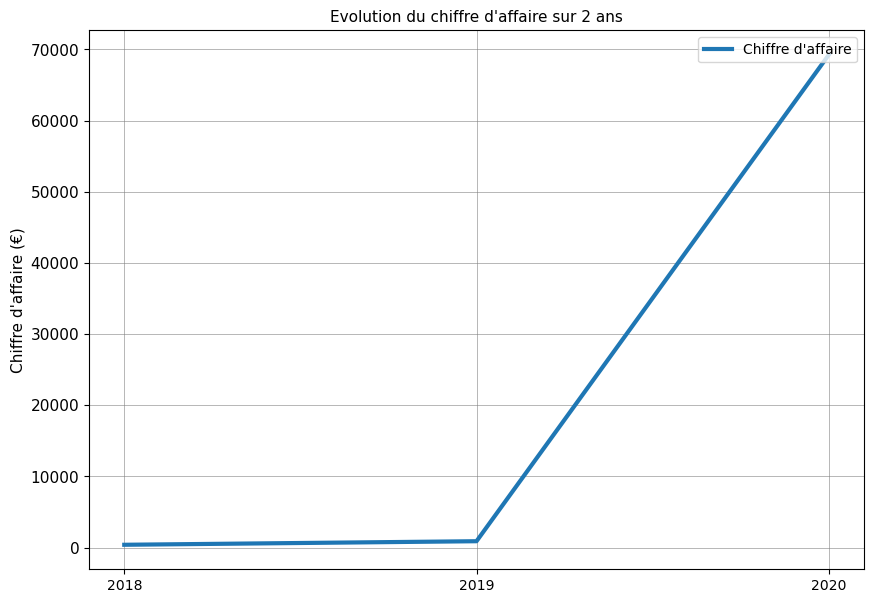

In [50]:
#Création de la colonne "Année" dans le df "CA"
CA['Année'] = CA['post_modified'].dt.year

# Aggrégation par Année et calcul du stock, du total des ventes et du chiffre d'affaire par année
CAannee=CA.groupby(['Année'])[['stock_quantity','total_sales',"Chiffre d'affaire"]] .sum()
CAannee = CAannee.reset_index()
CAannee.head(10)

#Graphique représentant l'évolution sur 2ans du chiffre d'affaire pour l'ensemble des prix
plt.figure(figsize=(10, 7))
plt.plot(CAannee['Année'], CAannee["Chiffre d'affaire"], label="Chiffre d'affaire", linewidth=3)
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Evolution du chiffre d'affaire sur 2 ans", fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

plt.xticks(CAannee['Année'], CAannee['Année'].astype(int))

plt.show()

## Chiffre d'affaire par trimestre pour l'ensemble des prix

In [51]:
#Création de la colonne "trimestre" dans le dataframe "A"
A['trimestre']=A['post_modified'].dt.quarter

#Création de la colonne "Année" dans le dataframe "A"
A['Année'] = A['post_modified'].dt.year

In [52]:
# Aggrégation par Année et par trimestre et calcul du stock, du total des ventes et du chiffre d'affaire par année
CA=A.groupby(['trimestre','Année'])[['stock_quantity','total_sales',"Chiffre d'affaire"]] .sum()
CA = CA.reset_index()
CA.head(10)

,trimestre,Année,stock_quantity,total_sales,Chiffre d'affaire
0,1.0,2018.0,0,0.0,0.0
1,1.0,2019.0,14,0.0,0.0
2,1.0,2020.0,380,46.0,2634.6
3,2.0,2018.0,0,10.0,250.0
4,2.0,2019.0,58,4.0,102.8
5,2.0,2020.0,1628,181.0,6462.1
6,3.0,2019.0,25,1.0,57.6
7,3.0,2020.0,18363,2601.0,60159.5
8,4.0,2018.0,3,4.0,156.0
9,4.0,2019.0,54,18.0,746.0


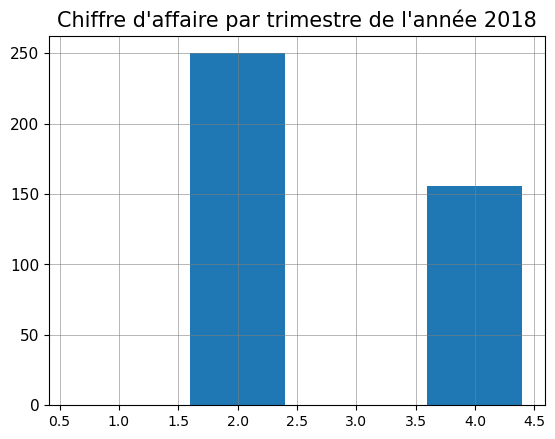

In [53]:
#Proportion du chiffre d'affaire par trimestre pour l'année 2018
CA2018=CA.loc[CA['Année']==2018]
plt.bar(height=CA2018["Chiffre d'affaire"], x=CA2018['trimestre'])
plt.title("Evolution du chiffre d'affaire sur 2 ans", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaire par trimestre de l'année 2018", fontsize=15)
plt.grid(color='gray', linestyle='-', linewidth=0.4)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


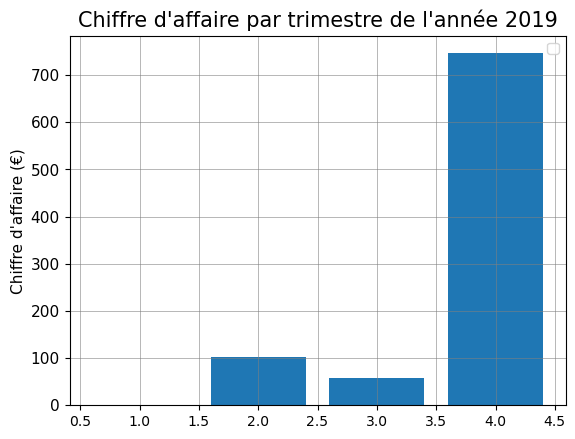

In [54]:
#Proportion du chiffre d'affaire par trimestre pour l'année 2019
CA2019=CA.loc[CA['Année']==2019]
plt.bar(height=CA2019["Chiffre d'affaire"], x=CA2019['trimestre'])
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaire par trimestre de l'année 2019", fontsize=15)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


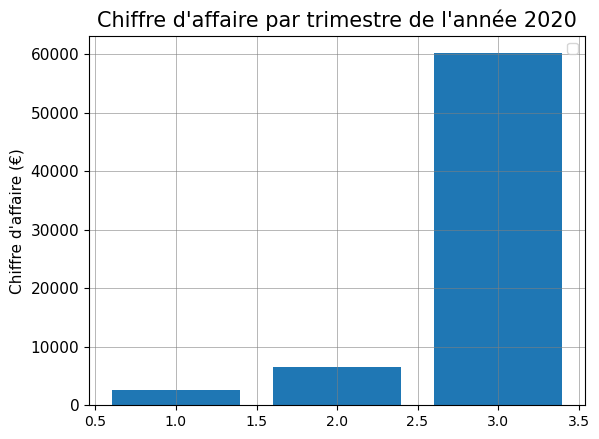

In [55]:
#Chiffre d'affaire par trimestre pour l'année 2020
CA2020=CA.loc[CA['Année']==2020]
plt.bar(height=CA2020["Chiffre d'affaire"], x=CA2020['trimestre'])
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaire par trimestre de l'année 2020", fontsize=15)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

## Nombre de vente annuelle

In [56]:
#Calcul du nombre de vente de bouteille en 2018
Vente2018=CA2018.loc[CA2018['total_sales']>0]
NbreVente2018=Vente2018['total_sales'].sum()
print("Pour l'année 2018, l'entreprise a réalisée ",round(NbreVente2018),"ventes de bouteilles")

#Calcul du nombre de vente de bouteille en 2019
Vente2019=CA2019.loc[CA2019['total_sales']>0]
NbreVente2019=Vente2019['total_sales'].sum()
print("Pour l'année 2019, l'entreprise a réalisée ",round(NbreVente2019),"ventes de bouteilles")

#Calcul du nombre de vente de bouteille en 2020
Vente2020=CA2020.loc[CA2020['total_sales']>0]
NbreVente2020=Vente2020['total_sales'].sum()
print("Pour l'année 2020, l'entreprise a réalisée ",round(NbreVente2020),"ventes de bouteilles")

Pour l'année 2018, l'entreprise a réalisée  14 ventes de bouteilles
Pour l'année 2019, l'entreprise a réalisée  23 ventes de bouteilles
Pour l'année 2020, l'entreprise a réalisée  2828 ventes de bouteilles


## Evolution du chiffre d'affaire sur 2 ans pour les bouteilles les plus chères

C:\Users\bello\AppData\Local\Temp\ipykernel_25896\1085299906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PrixEleve_CA['Année']=PrixEleve_CA['post_modified'].dt.strftime('%Y-%m')


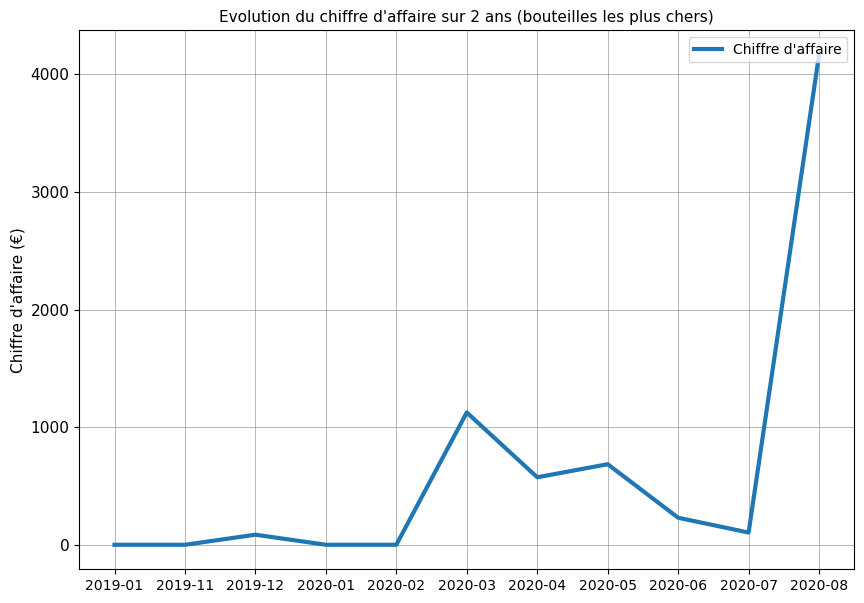

In [57]:
PrixEleve_CA=PrixEleve

#Création de la colonne "Année" sous le format "aaaa-mm"
PrixEleve_CA['Année']=PrixEleve_CA['post_modified'].dt.strftime('%Y-%m')
PrixEleve_CA=PrixEleve_CA.groupby(['Année'])[['stock_quantity','total_sales',"Chiffre d'affaire"]] .sum()
PrixEleve_CA = PrixEleve_CA.reset_index()

#Graphique représentant l'évolution sur 2ans du chiffre d'affaire pour les bouteilles les plus chères
plt.figure(figsize=(10, 7))
plt.plot(PrixEleve_CA['Année'], PrixEleve_CA["Chiffre d'affaire"], label="Chiffre d'affaire", linewidth=3)
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Evolution du chiffre d'affaire sur 2 ans (bouteilles les plus chers)", fontsize=11)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

plt.show()

## Chiffre d'affaire par trimestre pour les bouteilles les plus chères

In [58]:
PrixEleve_CA1=PrixEleve

#Création de la colonne "Année" dans le dataframe "PrixEleve_CA1"
PrixEleve_CA1['Année']=PrixEleve_CA1['post_modified'].dt.year

#Création de la colonne "trimestre" dans le dataframe "PrixEleve_CA1"
PrixEleve_CA1['trimestre']=PrixEleve_CA1['post_modified'].dt.quarter

# Aggrégation par Année et par trimestre et calcul du stock, du total des ventes et du chiffre d'affaire par année et par trimestre
PrixEleve_CA1=PrixEleve_CA1.groupby(['trimestre','Année'])[['stock_quantity','total_sales',"Chiffre d'affaire"]] .sum()
PrixEleve_CA1 = PrixEleve_CA1.reset_index()
PrixEleve_CA1.head(10)

C:\Users\bello\AppData\Local\Temp\ipykernel_25896\1159993855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PrixEleve_CA1['Année']=PrixEleve_CA1['post_modified'].dt.year
C:\Users\bello\AppData\Local\Temp\ipykernel_25896\1159993855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PrixEleve_CA1['trimestre']=PrixEleve_CA1['post_modified'].dt.quarter


,trimestre,Année,stock_quantity,total_sales,Chiffre d'affaire
0,1,2019,12,0.0,0.0
1,1,2020,37,5.0,1125.0
2,2,2020,110,10.0,1488.9
3,3,2020,66,29.0,4270.5
4,4,2019,7,1.0,85.6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


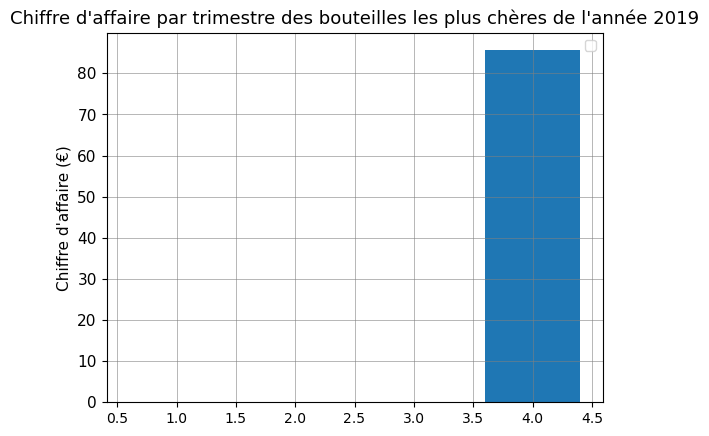

In [59]:
#Chiffre d'affaire par trimestre des bouteilles les plus chères pour l'année 2019
PrixEleve_CA2019=PrixEleve_CA1.loc[PrixEleve_CA1['Année']==2019]
plt.bar(height=PrixEleve_CA2019["Chiffre d'affaire"], x=PrixEleve_CA2019['trimestre'])
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaire par trimestre des bouteilles les plus chères de l'année 2019", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


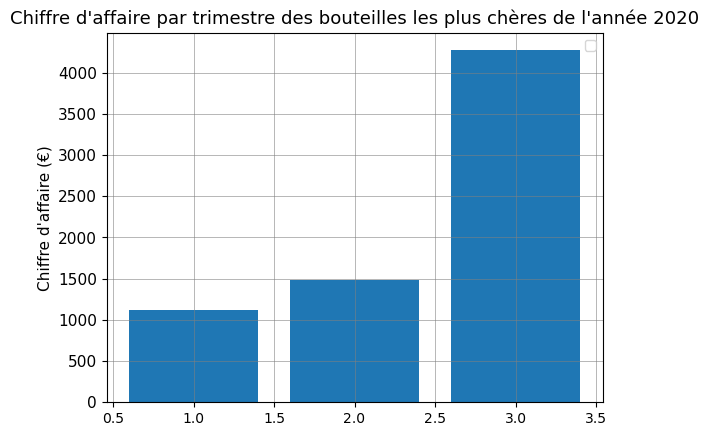

In [60]:
#Chiffre d'affaire par trimestre des bouteilles les plus chères pour l'année 2020
PrixEleve_CA2020=PrixEleve_CA1.loc[PrixEleve_CA1['Année']==2020]
plt.bar(height=PrixEleve_CA2020["Chiffre d'affaire"], x=PrixEleve_CA2020['trimestre'])
plt.legend(loc='upper right')
plt.ylabel("Chiffre d'affaire (€)", fontsize=11)
plt.yticks(fontsize=11)
plt.title("Chiffre d'affaire par trimestre des bouteilles les plus chères de l'année 2020", fontsize=13)
plt.grid(color='gray', linestyle='-', linewidth=0.4)

## Nombre de vente annuelle pour les bouteilles les plus chères

In [61]:

#Calcul du nombre de vente de bouteilles les plus chères en 2019
Vente2019PrixEleve=PrixEleve_CA2019.loc[PrixEleve_CA2019['total_sales']>0]
NbreVente2019PrixEleve=Vente2019PrixEleve['total_sales'].sum()
print("Pour l'année 2019, l'entreprise a réalisée ",round(NbreVente2019PrixEleve),"ventes de bouteilles")

#Calcul du nombre de vente de bouteilles les plus chères en 2020
Vente2020PrixEleve=PrixEleve_CA2020.loc[PrixEleve_CA2020['total_sales']>0]
NbreVente2020PrixEleve=Vente2020PrixEleve['total_sales'].sum()
print("Pour l'année 2020, l'entreprise a réalisée ",round(NbreVente2020PrixEleve),"ventes de bouteilles")

Pour l'année 2019, l'entreprise a réalisée  1 ventes de bouteilles
Pour l'année 2020, l'entreprise a réalisée  44 ventes de bouteilles
